In [1]:
#Importando as Bibliotecas que serão usadas.

import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

#ignorar os avisos.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Ler o arquivo em csv.
dados = pan.read_csv('ds_salaries.csv')

dados.shape

(607, 12)

In [3]:
#Observando os nomes das colunas.
dados.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [4]:
#Observando os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
#Observando os valores nulos.
dados.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#Campos unicos
dados.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
#Contando valores unicos 'importantes'
dados['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

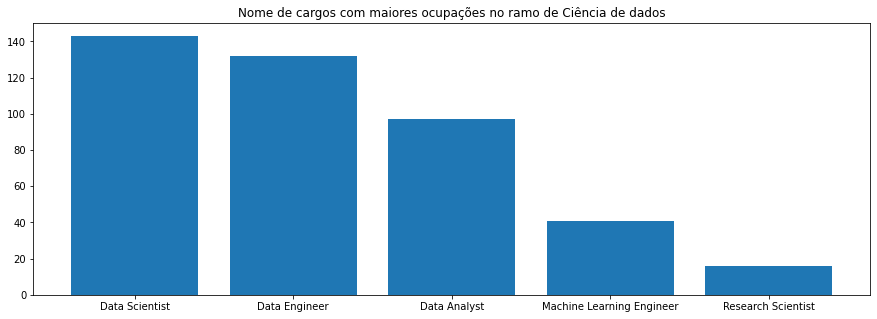

In [8]:
#Mostrando em gráfico de valores brutos os nomes de cargos mais realcionados.
dados['job_title'].value_counts().head
plt.figure(figsize=(15,5))
plt.title('Nome de cargos com maiores ocupações no ramo de Ciência de dados')
plt.bar(dados['job_title'].value_counts().head().index,dados['job_title'].value_counts().head());

In [9]:
#Tirando a média salarial dos cargos.
media_salarial_cargos = dados.groupby(['job_title'], as_index=False)['salary'].mean()
media_salarial_cargos = media_salarial_cargos.round()
media_salarial_cargos

,job_title,salary
0,3D Computer Vision Researcher,400000.0
1,AI Scientist,290571.0
2,Analytics Engineer,175000.0
3,Applied Data Scientist,172400.0
4,Applied Machine Learning Scientist,141350.0
5,BI Data Analyst,1902045.0
6,Big Data Architect,125000.0
7,Big Data Engineer,455000.0
8,Business Data Analyst,355000.0
9,Cloud Data Engineer,140000.0


In [10]:
#Ordenando as médias salarias
media_salarial_cargos = media_salarial_cargos.sort_values('salary', ascending = False)
media_salarial_cargos.head()

,job_title,salary
31,Head of Machine Learning,6000000.0
36,ML Engineer,2676667.0
5,BI Data Analyst,1902045.0
34,Lead Data Scientist,1101667.0
21,Data Science Manager,1062599.0


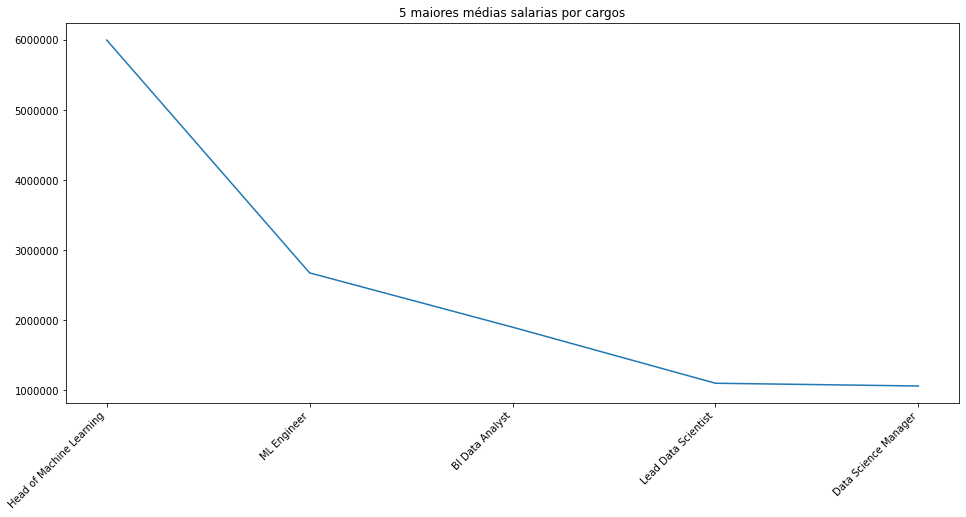

In [11]:
#Visualizando em Gráfico.
plt.figure(figsize=(16,7))
plt.plot(media_salarial_cargos['job_title'].head(),media_salarial_cargos['salary'].head())
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right',)
plt.title('5 maiores médias salarias por cargos');